# Chapter 13: Poisson Processes
 
This Jupyter notebook is the Python equivalent of the R code in section 13.5 R, pp. 534 - 536, [Introduction to Probability, 1st Edition](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578), Blitzstein & Hwang.

----

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1D Poisson process

In Chapter 5, we discussed how to simulate a specified number of arrivals from a one-dimensional Poisson process by using the fact that the interarrival times are i.i.d. Exponentials. In this chapter, Story 13.2.3 tells us how to simulate a Poisson process within a specified interval $(0, \left.L\right]$. We first generate the number of arrivals $N(L)$, which is distributed $Pois(\lambda L)$. Conditional on $N(L) = n$, the arrival times are distributed as the order statistics of $n$ i.i.d. $Unif(0, L)$ r.v.s. The following code simulates arrivals from a Poisson process with rate 10 in the interval $(0, \left. 5\right]$:

In [2]:
np.random.seed(2971215073)

from scipy.stats import poisson, uniform

L = 5 
lambd = 10 
n = poisson.rvs(lambd*L, size=1)[0]
t = np.sort(uniform.rvs(loc=0, scale=(L-0), size=n))

To visualize the Poisson process we have generated, we can plot the cumulative number of arrivals $N(t)$ as a function of $t$:

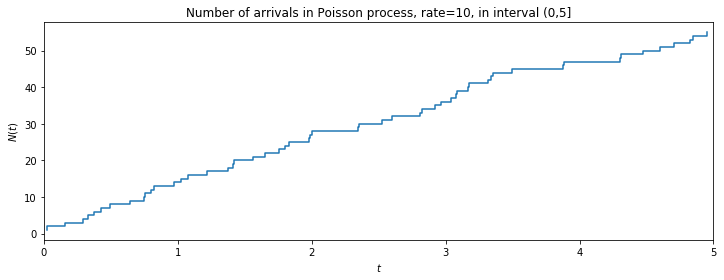

In [3]:
plt.figure(figsize=(12, 4))

nt = np.arange(1, n+1)
plt.plot(t, nt, linestyle='-', drawstyle='steps')

plt.xlabel(r'$t$')
plt.xlim([0,5])
plt.ylabel(r'$N(t)$')
plt.title(r'Number of arrivals in Poisson process, rate=10, in interval (0,5]')

plt.show()

This produces a staircase plot as in Figure 13.8.

## Thinning

The following code starts with an array of arrival times `t` and the corresponding number of arrivals `n`, generated according to the previous section. For each arrival, we flip a coin with probability `p` of Heads; these coin tosses are stored in the array `y`. Finally, the arrivals for which the coin landed Heads are labeled as type-1; the rest are labeled as type-2. The resulting arrays of arrival times $t_1$ and $t_2$ are realizations of independent Poisson processes, by Theorem 13.2.13. To perform this with $p = 0.3$, we can execute

In [4]:
np.random.seed(1)

from scipy.stats import binom

p = 0.3 
y = binom.rvs(1, p, size=n)

t1 = t[np.where(y==1)]
t2 = t[np.where(y==0)]

As before, we can plot the number of arrivals in each Poisson process, $N_{1}(t)$ and $N_{2}(t)$, as a function of $t$.

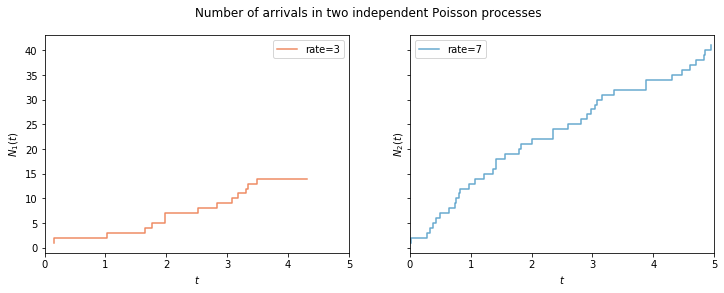

In [5]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

# graph for t1
nt1 = np.arange(1, t1.size+1)
ax1.plot(t1, nt1, linestyle='-', drawstyle='steps', color='#ef8a62', label='rate=3')
ax1.set_xlabel(r'$t$')
ax1.set_xlim([0,5])
ax1.set_ylabel(r'$N_{1}(t)$')
ax1.legend()

# graph for t2
nt2 = np.arange(1, t2.size+1)
ax2.plot(t2, nt2, linestyle='-', drawstyle='steps', color='#67a9cf', label='rate=7')
ax2.set_xlabel(r'$t$')
ax2.set_xlim([0,5])
ax2.set_ylabel(r'$N_{2}(t)$')
ax2.legend()

plt.suptitle('Number of arrivals in two independent Poisson processes')

plt.show()

## 2D Poisson process 

Simulating a 2D Poisson process is nearly as straightforward as simulating a 1D Poisson process. In the square $(0, \left. L\right] \times (0, \left. L \right]$, the number of arrivals is distributed $Pois(\lambda L^2)$. Conditional on the number of arrivals, the locations of the arrivals are Uniform over the square, so by Example 7.1.22, their horizontal and vertical coordinates can be generated independently:

In [6]:
np.random.seed(1)

L = 5 
lambd = 10 
n = poisson.rvs(lambd*(L**2), size=1)[0]
x = uniform.rvs(loc=0, scale=(L-0), size=n)
y = uniform.rvs(loc=0, scale=(L-0), size=n)

We can then easily plot the locations of the arrivals as in Figure 13.7:

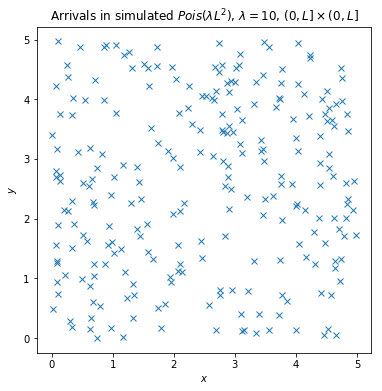

In [7]:
plt.figure(figsize=(6, 6))

plt.plot(x, y, 'x')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Arrivals in simulated $Pois(\lambda L^2)$, $\lambda={}$, $(0,L] \times (0,L]$'.format(lambd))

plt.show()

----

&copy; Blitzstein, Joseph K.; Hwang, Jessica. Introduction to Probability (Chapman & Hall/CRC Texts in Statistical Science).